# Applied Data Science Capstone

## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

## 1. Introduction/Business Problem

The goal of the project is to explore various cities in India to find the city with the best distributions of restaurants, and then explore that particular city to find the types of restaurants and their ratings, and the area with the best restauants.

The data collected from this study can be used by entreprenurs dealing with food related businesses or popular food chains looking to establish a new restaurant in India, or even tourists wanting to try out food in Indian cities.

## 2. Data

To provide the necessary information, the following data will be used:
- Cites, Latitude, Longitude: http://www.tageo.com/index-e-in-cities-IN.htm
- Restaurants: Foursquare API, Zomato API


## 3. Methodology

First, we will import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np


import json
from pandas.io.json import json_normalize

import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup


!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim



import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


!conda install -c conda-forge folium=0.5.0 --yes
import folium


from sklearn.cluster import KMeans

print('Done!')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Done!


Now, we will use Beautiful Soup to scrape the Indian Cities Data.

In [2]:
url = "http://www.tageo.com/index-e-in-cities-IN.htm"

headers= {'User-Agent': 'Chrome/77.0.3865.120'}


In [3]:
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
response.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<title>INDIA City & Town Population Geography Population Map cities coordinates location - Tageo.com</title>\n<!--<meta http-equiv="Content-Type" content="text/html; charset=\'iso-8859-1\'" />-->\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<!--META-->\n<meta http-equiv="Content-Language" content="en" />\n<meta name="Description" content="Geographical database, places and cities in the whole world" />\n<meta name="KeyWords" content="city, cities, geography, place, places, towns, coordinate, coordinates, latitude, longitude, country,countries capital, capitale, currency,currencies, PPP, product  per capita, Gross domestic product  per capita, GDP per capita, name, family, ancestry" />\n<meta name="KeyWords" content="genealogy, documentation, dictionnary,directory, population, area, density, world, localization, loc

In [6]:
soup = BeautifulSoup(response.content, 'lxml')

In [7]:
table=soup.find_all('table',class_="V2")

In [8]:
len(table)

1

In [9]:
table = table[0]

In [10]:
for row in table.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell.text)

Rank
City
Population (2000)
Latitude (DD)
Longitude (DD)
1
Mumbai
12622500
18.960
72.820
2
Dilli
10400900
28.670
77.210
3
Kolkata
4852800
22.570
88.360
4
Bengaluru
4547300
12.970
77.560
5
Chennai
4466900
13.090
80.270
6
Ahmadabad
3724300
23.030
72.580
7
Haidarabad
3654900
17.400
78.480
8
Pune
2691000
18.530
73.840
9
Kanpur
2682600
26.470
80.330
10
Surat
2578400
21.200
72.820
11
Jaipur
2462500
26.920
75.800
12
Lakhnau
2338500
26.850
80.920
13
Nagpur
2173200
21.160
79.080
14
Indore
1692400
22.720
75.860
15
Bhopal
1519100
23.240
77.400
16
Ludhiana
1478000
30.910
75.840
17
Patna
1458800
25.620
85.130
18
Vadodara
1383700
22.310
73.180
19
Thana
1336500
19.200
72.970
20
Agra
1334900
27.190
78.010
21
Kalyan
1264200
19.250
73.160
22
Varanasi
1166200
25.320
83.010
23
Nashik
1141000
20.010
73.780
24
Mirat
1138100
28.990
77.700
25
Faridabad
1117700
28.380
77.300
26
Haora
1068700
22.580
88.330
27
Pimpri
1066200
18.620
73.800
28
Allahabad
1049200
25.450
81.840
29
Amritsar
1033700
31.640
74.870
30
Vi

In [11]:
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df = pd.DataFrame(res, columns=["Rank", "City", "Population", "Lattitude", "Longitude"])
df.head()

,Rank,City,Population,Lattitude,Longitude
0,Rank,City,Population (2000),Latitude (DD),Longitude (DD)
1,1,Mumbai,12622500,18.960,72.820
2,2,Dilli,10400900,28.670,77.210
3,3,Kolkata,4852800,22.570,88.360
4,4,Bengaluru,4547300,12.970,77.560


In [12]:
df=df.drop(df.index[0])
df


,Rank,City,Population,Lattitude,Longitude
1,1,Mumbai,12622500,18.960,72.820
2,2,Dilli,10400900,28.670,77.210
3,3,Kolkata,4852800,22.570,88.360
4,4,Bengaluru,4547300,12.970,77.560
5,5,Chennai,4466900,13.090,80.270
6,6,Ahmadabad,3724300,23.030,72.580
7,7,Haidarabad,3654900,17.400,78.480
8,8,Pune,2691000,18.530,73.840
9,9,Kanpur,2682600,26.470,80.330
10,10,Surat,2578400,21.200,72.820


In [13]:
df['Longitude'] = df['Longitude'].astype(float)
df['Lattitude'] = df['Lattitude'].astype(float)


Next, we will use folium to plot the cities on a map.

In [184]:
map_tohood = folium.Map(location=[18.960,72.820], zoom_start=3)


for lat, lng, city in zip(df['Lattitude'], df['Longitude'],  df['City']):
    label = '{},{},{}'.format(city,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3.0,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_tohood)  
    
map_tohood

In [15]:
CLIENT_ID = 'CUZSN1XIPJ2BZPGXIJ1W3TT5F0I0NHKBX0DDHHAM3ZJV4WJX' # your Foursquare ID
CLIENT_SECRET = 'RETFWMZMAAFARBE4SYUJU1JDDUXHCIZPGR3J1MFCEXQGNM5X' # your Foursquare Secret
VERSION = '20191001'
LIMIT = 20
RADIUS=50000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CUZSN1XIPJ2BZPGXIJ1W3TT5F0I0NHKBX0DDHHAM3ZJV4WJX
CLIENT_SECRET:RETFWMZMAAFARBE4SYUJU1JDDUXHCIZPGR3J1MFCEXQGNM5X


### Foursquare API

We will use the Foursquare API to get all the venues within a 50 km radius of each city in India.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Lattitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Lattitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
       
 

In [17]:
df_venues = getNearbyVenues(names = df['City'], latitudes = df['Lattitude'],longitudes = df['Longitude'],radius=RADIUS)


,City,Lattitude,Longitude,Venue,Venue Lattitude,Venue Longitude,Venue Category
0,Mumbai,18.96,72.82,Narayan Dosa,18.957445,72.813251,Fast Food Restaurant
1,Mumbai,18.96,72.82,Shree Thaker Bhojnalay,18.951217,72.828326,Indian Restaurant
2,Mumbai,18.96,72.82,Marine Drive,18.941221,72.823261,Scenic Lookout
3,Mumbai,18.96,72.82,Nariman Point,18.929183,72.822232,Scenic Lookout
4,Mumbai,18.96,72.82,Wankhede Stadium,18.938792,72.825944,Cricket Ground


In [18]:
df_venues

,City,Lattitude,Longitude,Venue,Venue Lattitude,Venue Longitude,Venue Category
0,Mumbai,18.96,72.82,Narayan Dosa,18.957445,72.813251,Fast Food Restaurant
1,Mumbai,18.96,72.82,Shree Thaker Bhojnalay,18.951217,72.828326,Indian Restaurant
2,Mumbai,18.96,72.82,Marine Drive,18.941221,72.823261,Scenic Lookout
3,Mumbai,18.96,72.82,Nariman Point,18.929183,72.822232,Scenic Lookout
4,Mumbai,18.96,72.82,Wankhede Stadium,18.938792,72.825944,Cricket Ground
5,Mumbai,18.96,72.82,Haji Ali Sea Face,18.978995,72.811854,Scenic Lookout
6,Mumbai,18.96,72.82,The St. Regis Mumbai,18.993652,72.825220,Hotel
7,Mumbai,18.96,72.82,Taj Mahal Palace & Tower,18.922306,72.833578,Hotel
8,Mumbai,18.96,72.82,Natural's Ice Cream Parlour,18.934892,72.824222,Ice Cream Shop
9,Mumbai,18.96,72.82,Swati Snacks,18.966442,72.813531,Indian Restaurant


Next, we will attach weights to each type of food related venue.  
Indian Restaurant:7, Hotel:6, Ice Cream Shop:6, Bar:3, Seafood Restaurant: 5, Coffee Shop:4, Diner: 3, Fast Food Restaurant: 3, Club House:9, Café: 10

In [153]:
k = df_venues.copy(deep = True)
weights_dict={'Indian Restaurant':7,'Hotel':6,'Ice Cream Shop':6, 'Bar':3,'Seafood Restaurant': 5,'Coffee Shop':4, 'Diner': 3,'Fast Food Restaurant': 3,'Club House':9,'Café': 10}
data = df_venues['Venue Category']
allVenues = data.values.tolist()

In [154]:
weights = []
for i in allVenues:
    if i in weights_dict.keys():
        weights.append(weights_dict[i])
    else :
        weights.append(0)
df_venues['weights'] = weights;
df_venues.head()

,City,Lattitude,Longitude,Venue,Venue Lattitude,Venue Longitude,Venue Category,weights
1,Mumbai,18.96,72.82,Shree Thaker Bhojnalay,18.951217,72.828326,Indian Restaurant,7
6,Mumbai,18.96,72.82,The St. Regis Mumbai,18.993652,72.825220,Hotel,6
7,Mumbai,18.96,72.82,Taj Mahal Palace & Tower,18.922306,72.833578,Hotel,6
8,Mumbai,18.96,72.82,Natural's Ice Cream Parlour,18.934892,72.824222,Ice Cream Shop,6
9,Mumbai,18.96,72.82,Swati Snacks,18.966442,72.813531,Indian Restaurant,7


We will drop the venues with a weight of 0.

In [155]:
df_venues.drop(df_venues[df_venues.weights < 1.0].index, inplace=True)
df_venues.head()

,City,Lattitude,Longitude,Venue,Venue Lattitude,Venue Longitude,Venue Category,weights
1,Mumbai,18.96,72.82,Shree Thaker Bhojnalay,18.951217,72.828326,Indian Restaurant,7
6,Mumbai,18.96,72.82,The St. Regis Mumbai,18.993652,72.825220,Hotel,6
7,Mumbai,18.96,72.82,Taj Mahal Palace & Tower,18.922306,72.833578,Hotel,6
8,Mumbai,18.96,72.82,Natural's Ice Cream Parlour,18.934892,72.824222,Ice Cream Shop,6
9,Mumbai,18.96,72.82,Swati Snacks,18.966442,72.813531,Indian Restaurant,7


We are then calculating the mean of weights of all cities.

In [179]:
venues_weights = df_venues[['City','weights']].copy()
venues_weights_means = venues_weights.groupby(['City']).mean()
venues_weights_means = venues_weights_means.reset_index(drop=False)
venues_weights_means.head()

,City,weights
0,Agra,6.400000
1,Ahmadabad,6.500000
2,Aligarh,6.250000
3,Allahabad,5.000000
4,Amritsar,6.666667


In [180]:
venues_weights_means

,City,weights
0,Agra,6.400000
1,Ahmadabad,6.500000
2,Aligarh,6.250000
3,Allahabad,5.000000
4,Amritsar,6.666667
5,Aurangabad,5.833333
6,Bengaluru,6.285714
7,Bhiwandi,4.857143
8,Bhopal,5.666667
9,Bhubaneswar,5.000000


Now, we select the city with the largest weight.

In [183]:
venues_weights_means.nlargest(1, ['weights'])

,City,weights
31,Ludhiana,7.0


In [131]:
df1=df.loc[df.City == 'Ludhiana']
df1

,Rank,City,Population,Lattitude,Longitude
16,16,Ludhiana,1478000,30.91,75.84


In [132]:
citylat=30.9010
citylong=75.8573

We use folium again to plot the city with the largest weight on a map.

In [133]:
city_map = folium.Map(location = [citylat, citylong], zoom_start = 12)
folium.Marker([citylat, citylong]).add_to(city_map)

city_map

Now, we are using Fourquare API again to extract the venues in a 100 KM radius of this city.

In [134]:
LIMIT = 100
RADIUS=100000

In [135]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [136]:
pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        citylat, 
                                                                        citylong, 
                                                                        RADIUS,
                                                                        LIMIT,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)
    
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))
foursquare_venues

Total 100 venues fetched within a total radius of 100.0 Km
Total 42 venues fetched within a total radius of 100.0 Km

Total 142 venues fetched


,name,categories,lat,lng
0,Bistro Flamme Bois,Café,30.899914,75.831546
1,Friends Dhaba,Indian Restaurant,30.914597,75.850875
2,Nik Baker's,Bakery,30.893423,75.821262
3,Sam's Pizza,Pizza Place,30.895292,75.822303
4,Bistro226,Restaurant,30.905436,75.832871
5,Diesel Store,Clothing Store,30.882992,75.781693
6,Cake Square,Café,30.895998,75.830277
7,Hot Breads,Fast Food Restaurant,30.893123,75.821730
8,Cinépolis,Multiplex,30.882644,75.782182
9,Bullscrado,Electronics Store,30.879115,75.870970


We plot these venues using folium.

In [137]:
city_map = folium.Map(location = [citylat, citylong], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(city_map)  


city_map

Now, we plot a bar graph represing all the venues in this city.

<BarContainer object of 44 artists>

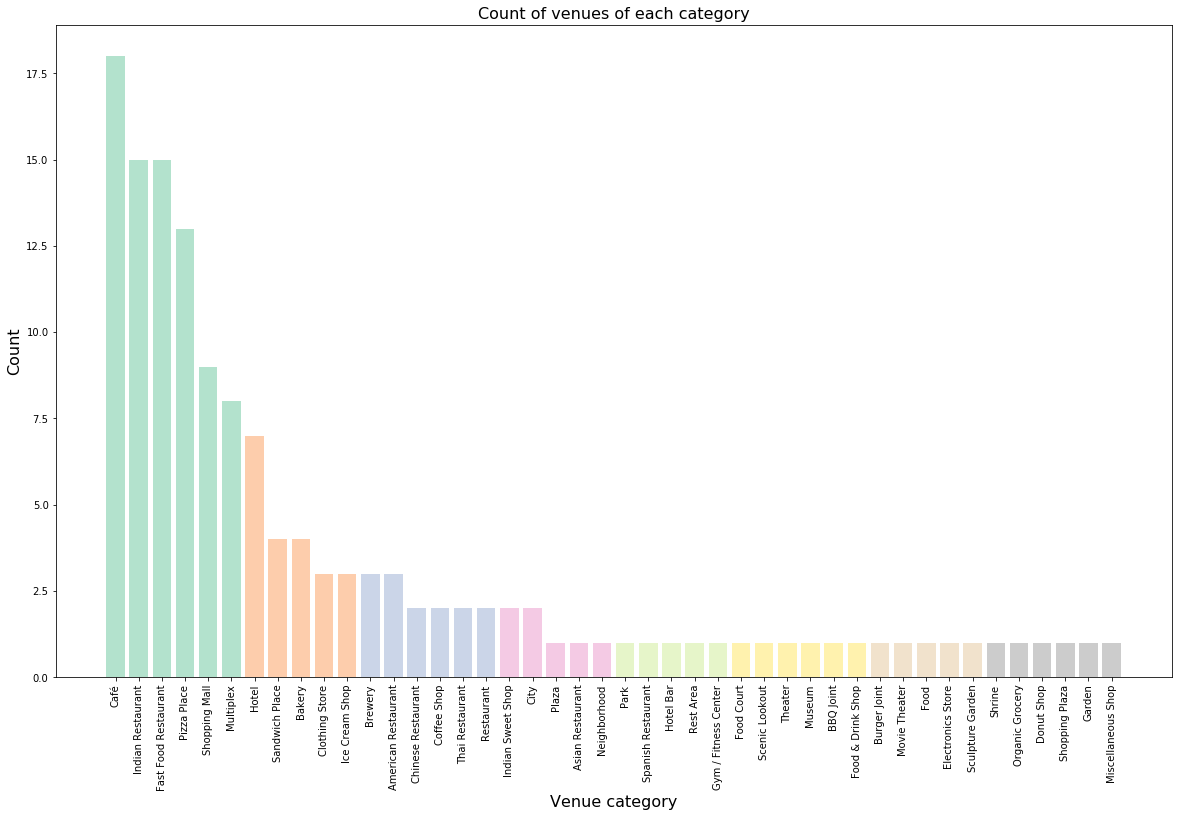

In [191]:
venue_distribution = foursquare_venues['categories'].value_counts()
colors = cm.Pastel2(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

We are now particularly interested in restaurants, so we move on.

We use Zomato API to fetch restaurant venues from the city.

In [160]:
headers = {'user-key': 'b3a1c26ed20422bfaae7ada558744e1f'}
venues_information = []

print("Fetching data for venue: Ludhiana")
url = ('https://developers.zomato.com/api/v2.1/search?q=ludhiana' + 
          '&start=0&count=100&lat=30.9010&lon=75.8573&sort=real_distance')
result = requests.get(url, headers = headers).json()
print("Got results from Zomato")
resturantsLen = len(result['restaurants'])
if (resturantsLen > 0):
    for x in range(resturantsLen):
        print("Fetched data for venue: {}, {}".format(x, result['restaurants'][x]['restaurant']['name']))
        venue = []
        venue.append(result['restaurants'][x]['restaurant']['name'])
        venue.append(result['restaurants'][x]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][x]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][x]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][x]['restaurant']['price_range'])
        venue.append(result['restaurants'][x]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][x]['restaurant']['location']['address'])
        venues_information.append(venue)
else:
    venues_information.append(np.zeros(7))
url = ('https://developers.zomato.com/api/v2.1/search?q=ludhiana' + 
          '&start=20&count=20&lat=30.9010&lon=75.8573&sort=real_distance')
result = requests.get(url, headers = headers).json()
print("Got results from Zomato")
resturantsLen = len(result['restaurants'])
if (resturantsLen > 0):
    for x in range(resturantsLen):
        print("Fetched data for venue: {}, {}".format(x, result['restaurants'][x]['restaurant']['name']))
        venue = []
        venue.append(result['restaurants'][x]['restaurant']['name'])
        venue.append(result['restaurants'][x]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][x]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][x]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][x]['restaurant']['price_range'])
        venue.append(result['restaurants'][x]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][x]['restaurant']['location']['address'])
        venues_information.append(venue)
else:
    venues_information.append(np.zeros(7))
url = ('https://developers.zomato.com/api/v2.1/search?q=ludhiana' + 
          '&start=40&count=20&lat=30.9010&lon=75.8573&sort=real_distance')
result = requests.get(url, headers = headers).json()
print("Got results from Zomato")
resturantsLen = len(result['restaurants'])
if (resturantsLen > 0):
    for x in range(resturantsLen):
        print("Fetched data for venue: {}, {}".format(x, result['restaurants'][x]['restaurant']['name']))
        venue = []
        venue.append(result['restaurants'][x]['restaurant']['name'])
        venue.append(result['restaurants'][x]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][x]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][x]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][x]['restaurant']['price_range'])
        venue.append(result['restaurants'][x]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][x]['restaurant']['location']['address'])
        venues_information.append(venue)
else:
    venues_information.append(np.zeros(7))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: Ludhiana
Got results from Zomato
Fetched data for venue: 0, Domino's Pizza
Fetched data for venue: 1, Patiala A One Dhaba
Fetched data for venue: 2, Bawa Chicken Corner
Fetched data for venue: 3, Shunty Confectionery
Fetched data for venue: 4, Parkash Dhaba
Fetched data for venue: 5, 3 Bharawan Di Hatti
Fetched data for venue: 6, Munna Bhai Juice & Snacks Bar
Fetched data for venue: 7, Sibal Food Plaza
Fetched data for venue: 8, Darshan Sweets
Fetched data for venue: 9, Jyoti Sweets
Fetched data for venue: 10, Snacks Bar Point
Fetched data for venue: 11, Om Bakery & Fast Food
Fetched data for venue: 12, Sibal Food Plaza
Fetched data for venue: 13, Panna Lal Pakode Wala
Fetched data for venue: 14, Kit Kat Mutton Corner
Fetched data for venue: 15, Lovely Bakery
Fetched data for venue: 16, New Gopal Ji Namkeen And Misthan Bhandhar
Fetched data for venue: 17, New New York Pizzeria
Fetched data for venue: 18, Guru Kirpa
Fetched data for venue: 19, Taste Makers
Got r

In [161]:
zomato_venues

,venue,latitude,longitude,price_for_two,price_range,rating,address
0,Domino's Pizza,30.9005840000,75.8587850000,400,1,3.5,"B 15 79 A 1, Upper Ground Floor, Raja Commerci..."
1,Patiala A One Dhaba,30.8996061879,75.8590018004,250,1,4.0,"B-15, 331, Behind Petrol Pump, Vishwkarma Chow..."
2,Bawa Chicken Corner,30.9029159546,75.8550643921,300,1,0,"Gt Road, Near Miller Ganj, Industrial Area, Lu..."
3,Shunty Confectionery,30.9038900000,75.8580910000,250,1,0,"Islam Ganj, Prem Nagar Road, Near Rajiv Footwe..."
4,Parkash Dhaba,30.9036357025,75.8547890691,600,2,4.1,"GT Road, Miller Ganj, Near, Industrial Area, L..."
5,3 Bharawan Di Hatti,30.9044820000,75.8578990000,200,1,2.8,"Prem Nagar Ludhiana, Industrial Area, Ludhiana"
6,Munna Bhai Juice & Snacks Bar,30.8979560000,75.8546090000,200,1,3.6,"Near Vishwakarma Chowk, Dhuriline, Near Civil ..."
7,Sibal Food Plaza,30.9047654788,75.8552879468,400,1,3.3,"Field Ganj, Clock Tower, Ludhiana Junction, Lu..."
8,Darshan Sweets,30.9056366000,75.8579336000,300,1,3.6,"Field Ganj, Kucha 16, Ludhiana Junction, Ludhiana"
9,Jyoti Sweets,30.9057099000,75.8578619000,200,1,3.2,"Kot Alamgir Field Ganj, Ludhiana Junction, Lud..."


In [162]:
zomato_venues['latitude']=zomato_venues['latitude'].astype(float)
zomato_venues['longitude']=zomato_venues['longitude'].astype(float)

We will plot these restaurants on a map using folium.

In [163]:
city_map = folium.Map(location = [citylat, citylong], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(city_map)  

city_map

We will now manipulate the dataframe to make a few changes, such as adding the average price per customer.

In [164]:
zomato_venues['average_price'] = zomato_venues['price_for_two']/2
zomato_venues 


,venue,latitude,longitude,price_for_two,price_range,rating,address,average_price
0,Domino's Pizza,30.900584,75.858785,400,1,3.5,"B 15 79 A 1, Upper Ground Floor, Raja Commerci...",200.0
1,Patiala A One Dhaba,30.899606,75.859002,250,1,4.0,"B-15, 331, Behind Petrol Pump, Vishwkarma Chow...",125.0
2,Bawa Chicken Corner,30.902916,75.855064,300,1,0,"Gt Road, Near Miller Ganj, Industrial Area, Lu...",150.0
3,Shunty Confectionery,30.903890,75.858091,250,1,0,"Islam Ganj, Prem Nagar Road, Near Rajiv Footwe...",125.0
4,Parkash Dhaba,30.903636,75.854789,600,2,4.1,"GT Road, Miller Ganj, Near, Industrial Area, L...",300.0
5,3 Bharawan Di Hatti,30.904482,75.857899,200,1,2.8,"Prem Nagar Ludhiana, Industrial Area, Ludhiana",100.0
6,Munna Bhai Juice & Snacks Bar,30.897956,75.854609,200,1,3.6,"Near Vishwakarma Chowk, Dhuriline, Near Civil ...",100.0
7,Sibal Food Plaza,30.904765,75.855288,400,1,3.3,"Field Ganj, Clock Tower, Ludhiana Junction, Lu...",200.0
8,Darshan Sweets,30.905637,75.857934,300,1,3.6,"Field Ganj, Kucha 16, Ludhiana Junction, Ludhiana",150.0
9,Jyoti Sweets,30.905710,75.857862,200,1,3.2,"Kot Alamgir Field Ganj, Ludhiana Junction, Lud...",100.0


In [165]:
zomato_venues = zomato_venues[zomato_venues['rating'] != 0.0]
print("Total venues available: {}".format(zomato_venues.shape[0]))

Total venues available: 51


Now, we will visual different aspects of the data we have collected using Zomato API.

**1.Ratings**

We will extract the ratings and visualse it.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Venues vs Rating')

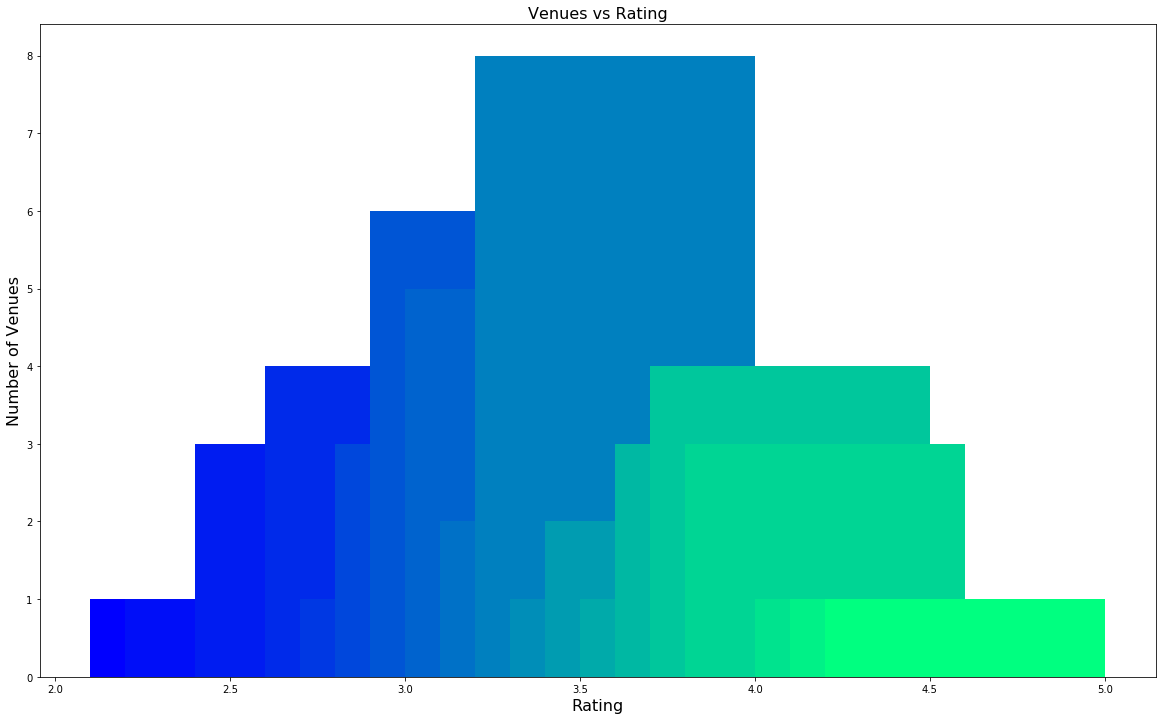

In [189]:
zomato_venues['rating'] = zomato_venues['rating'].astype(float)
rating = zomato_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.winter(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Number of Venues", fontsize = 16)
plt.title("Venues vs Rating", fontsize = 16)

In [167]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
zomato_venues['rating_bin'] = pd.cut(zomato_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


We will plot the rated venues on a map.

In [168]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

city_map = folium.Map(location = [citylat, citylong], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(zomato_venues['venue'], 
                                                          zomato_venues['address'], 
                                                          zomato_venues['latitude'], 
                                                          zomato_venues['longitude'], 
                                                          zomato_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(city_map)  



In [169]:
city_map

**2. Prices**

We will visualise the average price.

Text(0.5, 1.0, 'Venues vs Price')

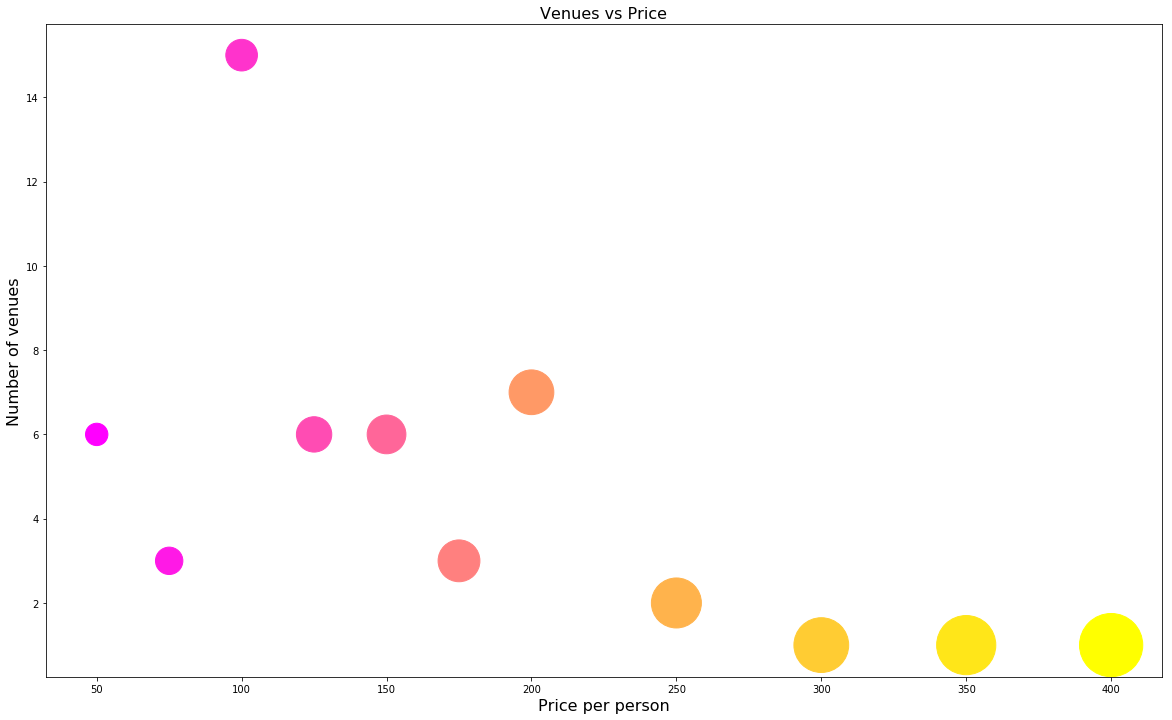

In [190]:
average_prices = zomato_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.spring(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Number of venues", fontsize = 16)
plt.title("Venues vs Price", fontsize = 16)

**3. Clustering**

We will cluster the restaurant venues on the basis of price and rating.

In [171]:
NO_OF_CLUSTERS = 2

clustering = zomato_venues.drop(['venue', 'address', 'rating_bin'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
zomato_venues.insert(0, 'cluster_labels', kMeans.labels_)
zomato_venues.head(5)

,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,average_price,rating_bin
0,1,Domino's Pizza,30.900584,75.858785,400,1,3.5,"B 15 79 A 1, Upper Ground Floor, Raja Commerci...",200.0,Good
1,0,Patiala A One Dhaba,30.899606,75.859002,250,1,4.0,"B-15, 331, Behind Petrol Pump, Vishwkarma Chow...",125.0,Good
4,1,Parkash Dhaba,30.903636,75.854789,600,2,4.1,"GT Road, Miller Ganj, Near, Industrial Area, L...",300.0,Very good
5,0,3 Bharawan Di Hatti,30.904482,75.857899,200,1,2.8,"Prem Nagar Ludhiana, Industrial Area, Ludhiana",100.0,Okay
6,0,Munna Bhai Juice & Snacks Bar,30.897956,75.854609,200,1,3.6,"Near Vishwakarma Chowk, Dhuriline, Near Civil ...",100.0,Good


In [188]:
city_map = folium.Map(location = [citylat, citylong], zoom_start = 13)
color_map = { 0: 'pink', 1: 'purple'}


markers_colors = []
for venue, address, cluster, latitude, longitude in zip(zomato_venues['venue'], 
                                                        zomato_venues['address'], 
                                                        zomato_venues['cluster_labels'], 
                                                        zomato_venues['latitude'], 
                                                        zomato_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(city_map)


for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(city_map)

city_map

We can see the two clusters on the map. Now, we will go through the venues of the clusters.

In [181]:
result = zomato_venues[zomato_venues['cluster_labels'] == 0]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,average_price,rating_bin
0,0,Patiala A One Dhaba,30.899606,75.859002,250,1,4.0,"B-15, 331, Behind Petrol Pump, Vishwkarma Chow...",125.0,Good
1,0,3 Bharawan Di Hatti,30.904482,75.857899,200,1,2.8,"Prem Nagar Ludhiana, Industrial Area, Ludhiana",100.0,Okay
2,0,Munna Bhai Juice & Snacks Bar,30.897956,75.854609,200,1,3.6,"Near Vishwakarma Chowk, Dhuriline, Near Civil ...",100.0,Good
3,0,Darshan Sweets,30.905637,75.857934,300,1,3.6,"Field Ganj, Kucha 16, Ludhiana Junction, Ludhiana",150.0,Good
4,0,Jyoti Sweets,30.905710,75.857862,200,1,3.2,"Kot Alamgir Field Ganj, Ludhiana Junction, Lud...",100.0,Good
5,0,Snacks Bar Point,30.905712,75.858635,200,1,3.6,"1228/C, Opposite Gulati Clinic, Field Ganj, Lu...",100.0,Good
6,0,Om Bakery & Fast Food,30.896910,75.854172,300,1,3.4,"Dhuri Line, Near Pal Clinic, Azad Nagar, Tagor...",150.0,Good
7,0,Sibal Food Plaza,30.905143,75.852724,250,1,3.0,"Street 8 Field Ganj, Dugri, Ludhiana",125.0,Okay
8,0,Panna Lal Pakode Wala,30.895157,75.858175,150,1,4.4,"Cycle Market, Gill Road, Industrial Area, Ludh...",75.0,Very good
9,0,Guru Kirpa,30.905548,75.862376,200,1,3.4,"Essa Nagar Puli, Near Mini Rose Garden, Hargob...",100.0,Good


In [174]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 1.00 and rating spread around 3.56


In [175]:
result = zomato_venues[zomato_venues['cluster_labels'] == 1]
print("Cluster 2")
result.head(10).reset_index(drop = True)

Cluster 2


,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,average_price,rating_bin
0,1,Domino's Pizza,30.900584,75.858785,400,1,3.5,"B 15 79 A 1, Upper Ground Floor, Raja Commerci...",200.0,Good
1,1,Parkash Dhaba,30.903636,75.854789,600,2,4.1,"GT Road, Miller Ganj, Near, Industrial Area, L...",300.0,Very good
2,1,Sibal Food Plaza,30.904765,75.855288,400,1,3.3,"Field Ganj, Clock Tower, Ludhiana Junction, Lu...",200.0,Good
3,1,Kit Kat Mutton Corner,30.906534,75.854275,400,1,3.3,"Kucha 12, Field Ganj, Ludhiana Junction, Ludhiana",200.0,Good
4,1,Lovely Bakery,30.907136,75.857427,400,1,3.2,"Shop 1212, Street 16, Field Ganj, Ludhiana Jun...",200.0,Good
5,1,New Gopal Ji Namkeen And Misthan Bhandhar,30.904861,75.862866,400,1,2.8,"1590, Salem Ganj, Janak Puri, Ludhiana",200.0,Okay
6,1,New New York Pizzeria,30.907014,75.859336,500,2,3.2,"Ground Floor, Singh Chupati, Opposite Civil Ho...",250.0,Good
7,1,Taste Makers,30.907568,75.857564,800,2,3.4,"210, Ground Floor, Opposite OBC, Main Road, Fi...",400.0,Good
8,1,Kalgidhar Pizza Point,30.908157,75.856245,400,1,4.5,"Field Ganj, Kalgidhar Road, Ludhiana Junction,...",200.0,Very good
9,1,Burger Grill,30.904532,75.864748,400,1,2.6,"52, Main Road Block E, BRS Nagar, Near Sant Fo...",200.0,Okay


In [176]:
print("These venues for cluster 2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 2 have mean price range of 1.33 and rating spread around 3.49


## 4. Results and Discussion

After our analysis, we have selected **Ludhiana** as our target city, based on the weights applied.  
  
In Ludhiana, we saw that a majority of the venues have a **rating of 3.5** and **average price per person of rupees 200**.

The results show clustering near Ludhiana junction. There is also not much difference between the two clusters

## 5. Conclusion

Therefore, we can conlcude that a food enthusiast visiting India might have a good experience in Ludhiana, with good food at decent prices. Even new food shop owners can establish restaurants here as there is demand for all types of food.